# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

### Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

print(f'Versão Pandas: {pd.__version__}')
print(f'Versão Numpy: {np.__version__}')

Versão Pandas: 1.0.3
Versão Numpy: 1.18.2


### Carregamento dos dados

In [2]:
black_friday = pd.read_csv('black_friday.csv')

### Cópia dos dados

In [3]:
black_friday_copy = black_friday.copy()

## Inicie sua análise a partir daqui

#### Caracteríticas dos dados

In [4]:
black_friday_copy.head().T

,0,1,2,3,4
User_ID,1000001,1000001,1000001,1000001,1000002
Product_ID,P00069042,P00248942,P00087842,P00085442,P00285442
Gender,F,F,F,F,M
Age,0-17,0-17,0-17,0-17,55+
Occupation,10,10,10,10,16
City_Category,A,A,A,A,C
Stay_In_Current_City_Years,2,2,2,2,4+
Marital_Status,0,0,0,0,0
Product_Category_1,3,1,12,12,8
Product_Category_2,NaN,6,NaN,14,NaN


In [5]:
print(f'Linhas: {black_friday_copy.shape[0]} | Colunas: {black_friday_copy.shape[1]}')

Linhas: 537577 | Colunas: 12


#### Colunas presentes

In [6]:
print(f'Colunas presentes: {list(black_friday_copy.columns.values)}')

Colunas presentes: ['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Purchase']


#### Tipos dos dados

In [7]:
print(f'Tipos dos dados: {list(black_friday_copy.dtypes.unique())}')

Tipos dos dados: [dtype('int64'), dtype('O'), dtype('float64')]


#### Estatística dos dados

In [8]:
black_friday_copy.drop(['User_ID'], axis=1).describe()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
black_friday_copy.drop(['Product_ID'], axis=1).describe(include='O')

,Gender,Age,City_Category,Stay_In_Current_City_Years
count,537577,537577,537577,537577
unique,2,7,3,5
top,M,26-35,B,1
freq,405380,214690,226493,189192


#### Tabela dos dados faltantes

In [10]:
bf_missing = pd.DataFrame({
    'nomes' : black_friday_copy.columns, 
    'tipos' : black_friday_copy.dtypes, 
    'NA #': black_friday_copy.isna().sum(), 
    'NA %' : (black_friday_copy.isna().sum() / black_friday_copy.shape[0]) * 100}).set_index('nomes')

bf_missing

,tipos,NA #,NA %
nomes,,,
User_ID,int64,0,0.000000
Product_ID,object,0,0.000000
Gender,object,0,0.000000
Age,object,0,0.000000
Occupation,int64,0,0.000000
City_Category,object,0,0.000000
Stay_In_Current_City_Years,object,0,0.000000
Marital_Status,int64,0,0.000000
Product_Category_1,int64,0,0.000000


#### Analisando a distribuição dos dados

In [11]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
print ('Matplotlib version: ', matplotlib.__version__)
print ('Seaborn version: ', sns.__version__)

matplotlib.style.use(['seaborn-notebook'])

Matplotlib version:  3.2.1
Seaborn version:  0.10.1


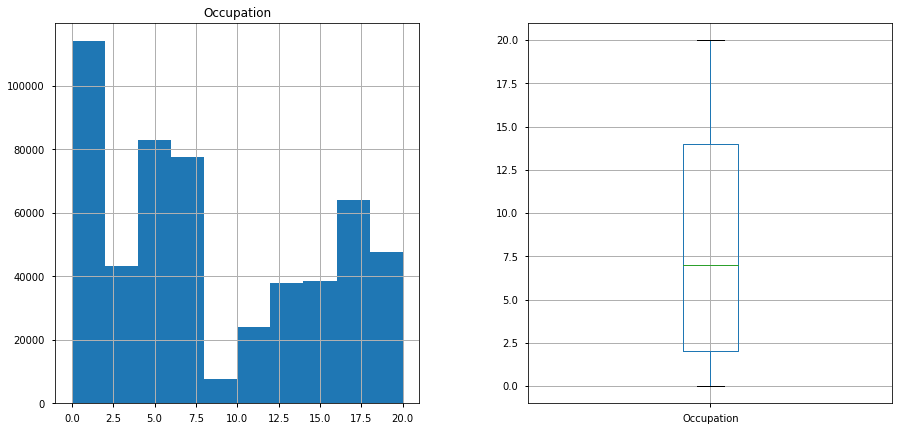

In [12]:
_, ax = plt.subplots(ncols=2, figsize=[15, 7])
black_friday_copy.hist(column='Occupation', grid=True, ax=ax[0])
black_friday_copy.boxplot(column='Occupation', ax=ax[1])
plt.show()

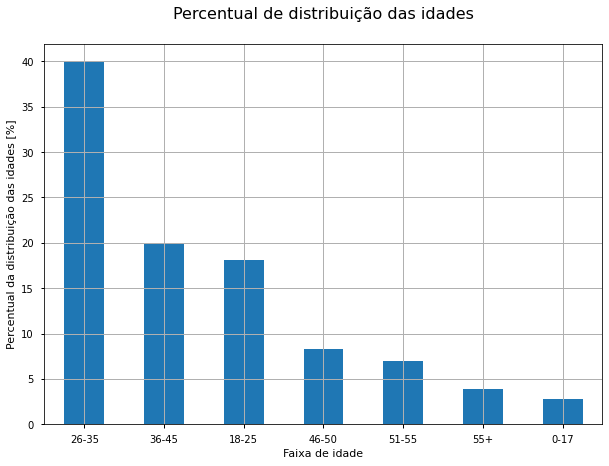

In [35]:
round(black_friday_copy['Age'].value_counts(normalize=True) * 100, 2).plot.bar(grid=True, rot=0)
plt.rcParams['figure.figsize']=[10, 7]
plt.title('Percentual de distribuição das idades', y=1.05, size=16)
plt.xlabel('Faixa de idade')
plt.ylabel('Percentual da distribuição das idades [%]')
plt.show()

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [15]:
def q1():
    return black_friday_copy.shape

In [16]:
q1()

(537577, 12)

## Questão 2

Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.

In [17]:
def q2():
    return black_friday[(black_friday_copy['Gender'] == 'F') & (black_friday_copy['Age'] == '26-35')].shape[0]

In [18]:
q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [19]:
def q3():
    return black_friday_copy['User_ID'].nunique()

In [20]:
q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [21]:
def q4():
    return black_friday_copy.dtypes.nunique()

In [22]:
q4()

3

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

In [23]:
def q5():
    return black_friday[black_friday_copy.isna().any(axis=1)].shape[0] / black_friday_copy.shape[0]

In [24]:
q5()

0.6944102891306734

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [25]:
def q6():
    return bf_missing['NA #'].max()

In [26]:
q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [27]:
def q7():
    return black_friday_copy['Product_Category_3'].dropna().mode()[0]

In [28]:
q7()

16.0

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

In [29]:
def q8():
    minimo = black_friday_copy['Purchase'].min()
    maximo = black_friday_copy['Purchase'].max()
    black_friday_copy['norm_Purchase'] = (black_friday_copy['Purchase'] - minimo) / (maximo - minimo)    
    return round(black_friday_copy['norm_Purchase'].mean(), 3)

In [30]:
q8()

0.385

## Questão 9

Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.

In [31]:
def q9():
    media = black_friday_copy['Purchase'].mean()
    desvio = black_friday_copy['Purchase'].std()
    
    black_friday_copy['standard_Purchase'] = (black_friday_copy['Purchase'] - media) / desvio
    
    return len(black_friday_copy[abs(black_friday_copy['standard_Purchase']) <= 1])

In [32]:
q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [33]:
def q10():
    Category_2 = list(black_friday_copy['Product_Category_2'].isnull())
    Category_3 = list(black_friday_copy['Product_Category_2'].isnull())
    
    black_friday_copy['compare'] = [True if (Category_2[c] is True) and (Category_3[c] is True) else False for c in range(len(Category_2))]
    return bool(bf_missing['NA #']['Product_Category_2'] == black_friday_copy[black_friday_copy['compare'] == True].shape[0])

In [34]:
q10()

True